In [283]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

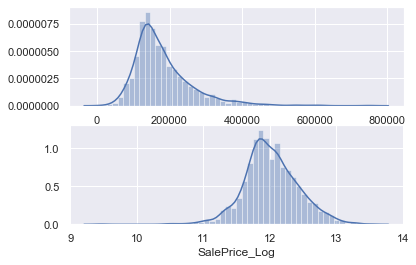

In [284]:
df_train = pd.read_csv("/Users/gandharkamat/projects/8010/Final/train.csv")
df_test = pd.read_csv("/Users/gandharkamat/projects/8010/Final/test.csv")

df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])

f, axes = plt.subplots(2, 1)
sns.distplot(df_train['SalePrice'], ax=axes[0])
sns.distplot(df_train['SalePrice_Log'], ax=axes[1])
plt.show()
df_train.drop('SalePrice',axis=1,inplace=True)

In [285]:

cat_cols_g = ["HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond"]
num_cols_g = ["YearBuilt","YearRemodAdd","MasVnrArea","OverallQual","OverallCond"]

cat_cols_r = ["MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType"]
num_cols_r = ['MSSubClass','LotArea','LotFrontage']

cat_cols_k = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir', 'Electrical']
num_cols_k = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath']

cat_cols_s = ["GarageFinish","GarageQual","KitchenQual","Functional","FireplaceQu","GarageType","GarageYrBlt"]
num_cols_s = ["GarageCars","GarageArea","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces"]

cat_cols_b = ["GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"]
num_cols_b = ["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold"]

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

fillna_cat_cols = [
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Exterior1st",
    "BsmtCond",
    "BsmtQual",
    "Fence",
    "FireplaceQu",
    "Functional",
    "GarageYrBlt",
    "GarageCond",
    "GarageFinish",
    "GarageQual",
    "GarageType",
    "KitchenQual",
    "MiscFeature",
    "PoolQC",
    'Alley'
]

for item in fillna_cat_cols:
    df_train[item].fillna('None',inplace=True)
    df_test[item].fillna('None',inplace=True)

fillmean_num_cols = ["LotFrontage","MasVnrArea",'BsmtFullBath','BsmtFinSF1','TotalBsmtSF','BsmtFinSF2','BsmtUnfSF',"GarageArea","GarageCars","BsmtHalfBath"]

for item in fillmean_num_cols:
    df_train[item].fillna(df_train[item].mean(),inplace=True)
    df_test[item].fillna(df_test[item].mean(),inplace=True)

fillmode_cat_cols = ['Electrical','MasVnrType','MSZoning','Utilities','Exterior2nd','SaleType']

for item in fillmode_cat_cols:
    df_train[item].fillna(df_train[item].mode().iloc[0],inplace=True)
    df_test[item].fillna(df_test[item].mode().iloc[0],inplace=True)

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))


              Total   Percent
PoolQC         2917  0.995563
MiscFeature    2824  0.963823
Alley          2732  0.932423
Fence          2358  0.804778
FireplaceQu    1422  0.485324
LotFrontage     490  0.167235
GarageCond      159  0.054266
GarageQual      159  0.054266
GarageYrBlt     159  0.054266
GarageFinish    159  0.054266
GarageType      157  0.053584
BsmtExposure     83  0.028328
BsmtFinType2     81  0.027645
BsmtQual         80  0.027304
BsmtCond         80  0.027304
BsmtFinType1     80  0.027304
MasVnrType       23  0.007850
MasVnrArea       23  0.007850
BsmtFullBath      2  0.000683
BsmtHalfBath      2  0.000683
               Total  Percent
SalePrice_Log      0      0.0
SaleCondition      0      0.0
RoofMatl           0      0.0
Exterior1st        0      0.0
Exterior2nd        0      0.0
MasVnrType         0      0.0
MasVnrArea         0      0.0
ExterQual          0      0.0
ExterCond          0      0.0
Foundation         0      0.0
BsmtQual           0      0.0
BsmtCond  

['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'OverallQual', 'OverallCond', 'MSSubClass', 'LotArea', 'LotFrontage', 'GarageCars', 'GarageArea', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice_Log']


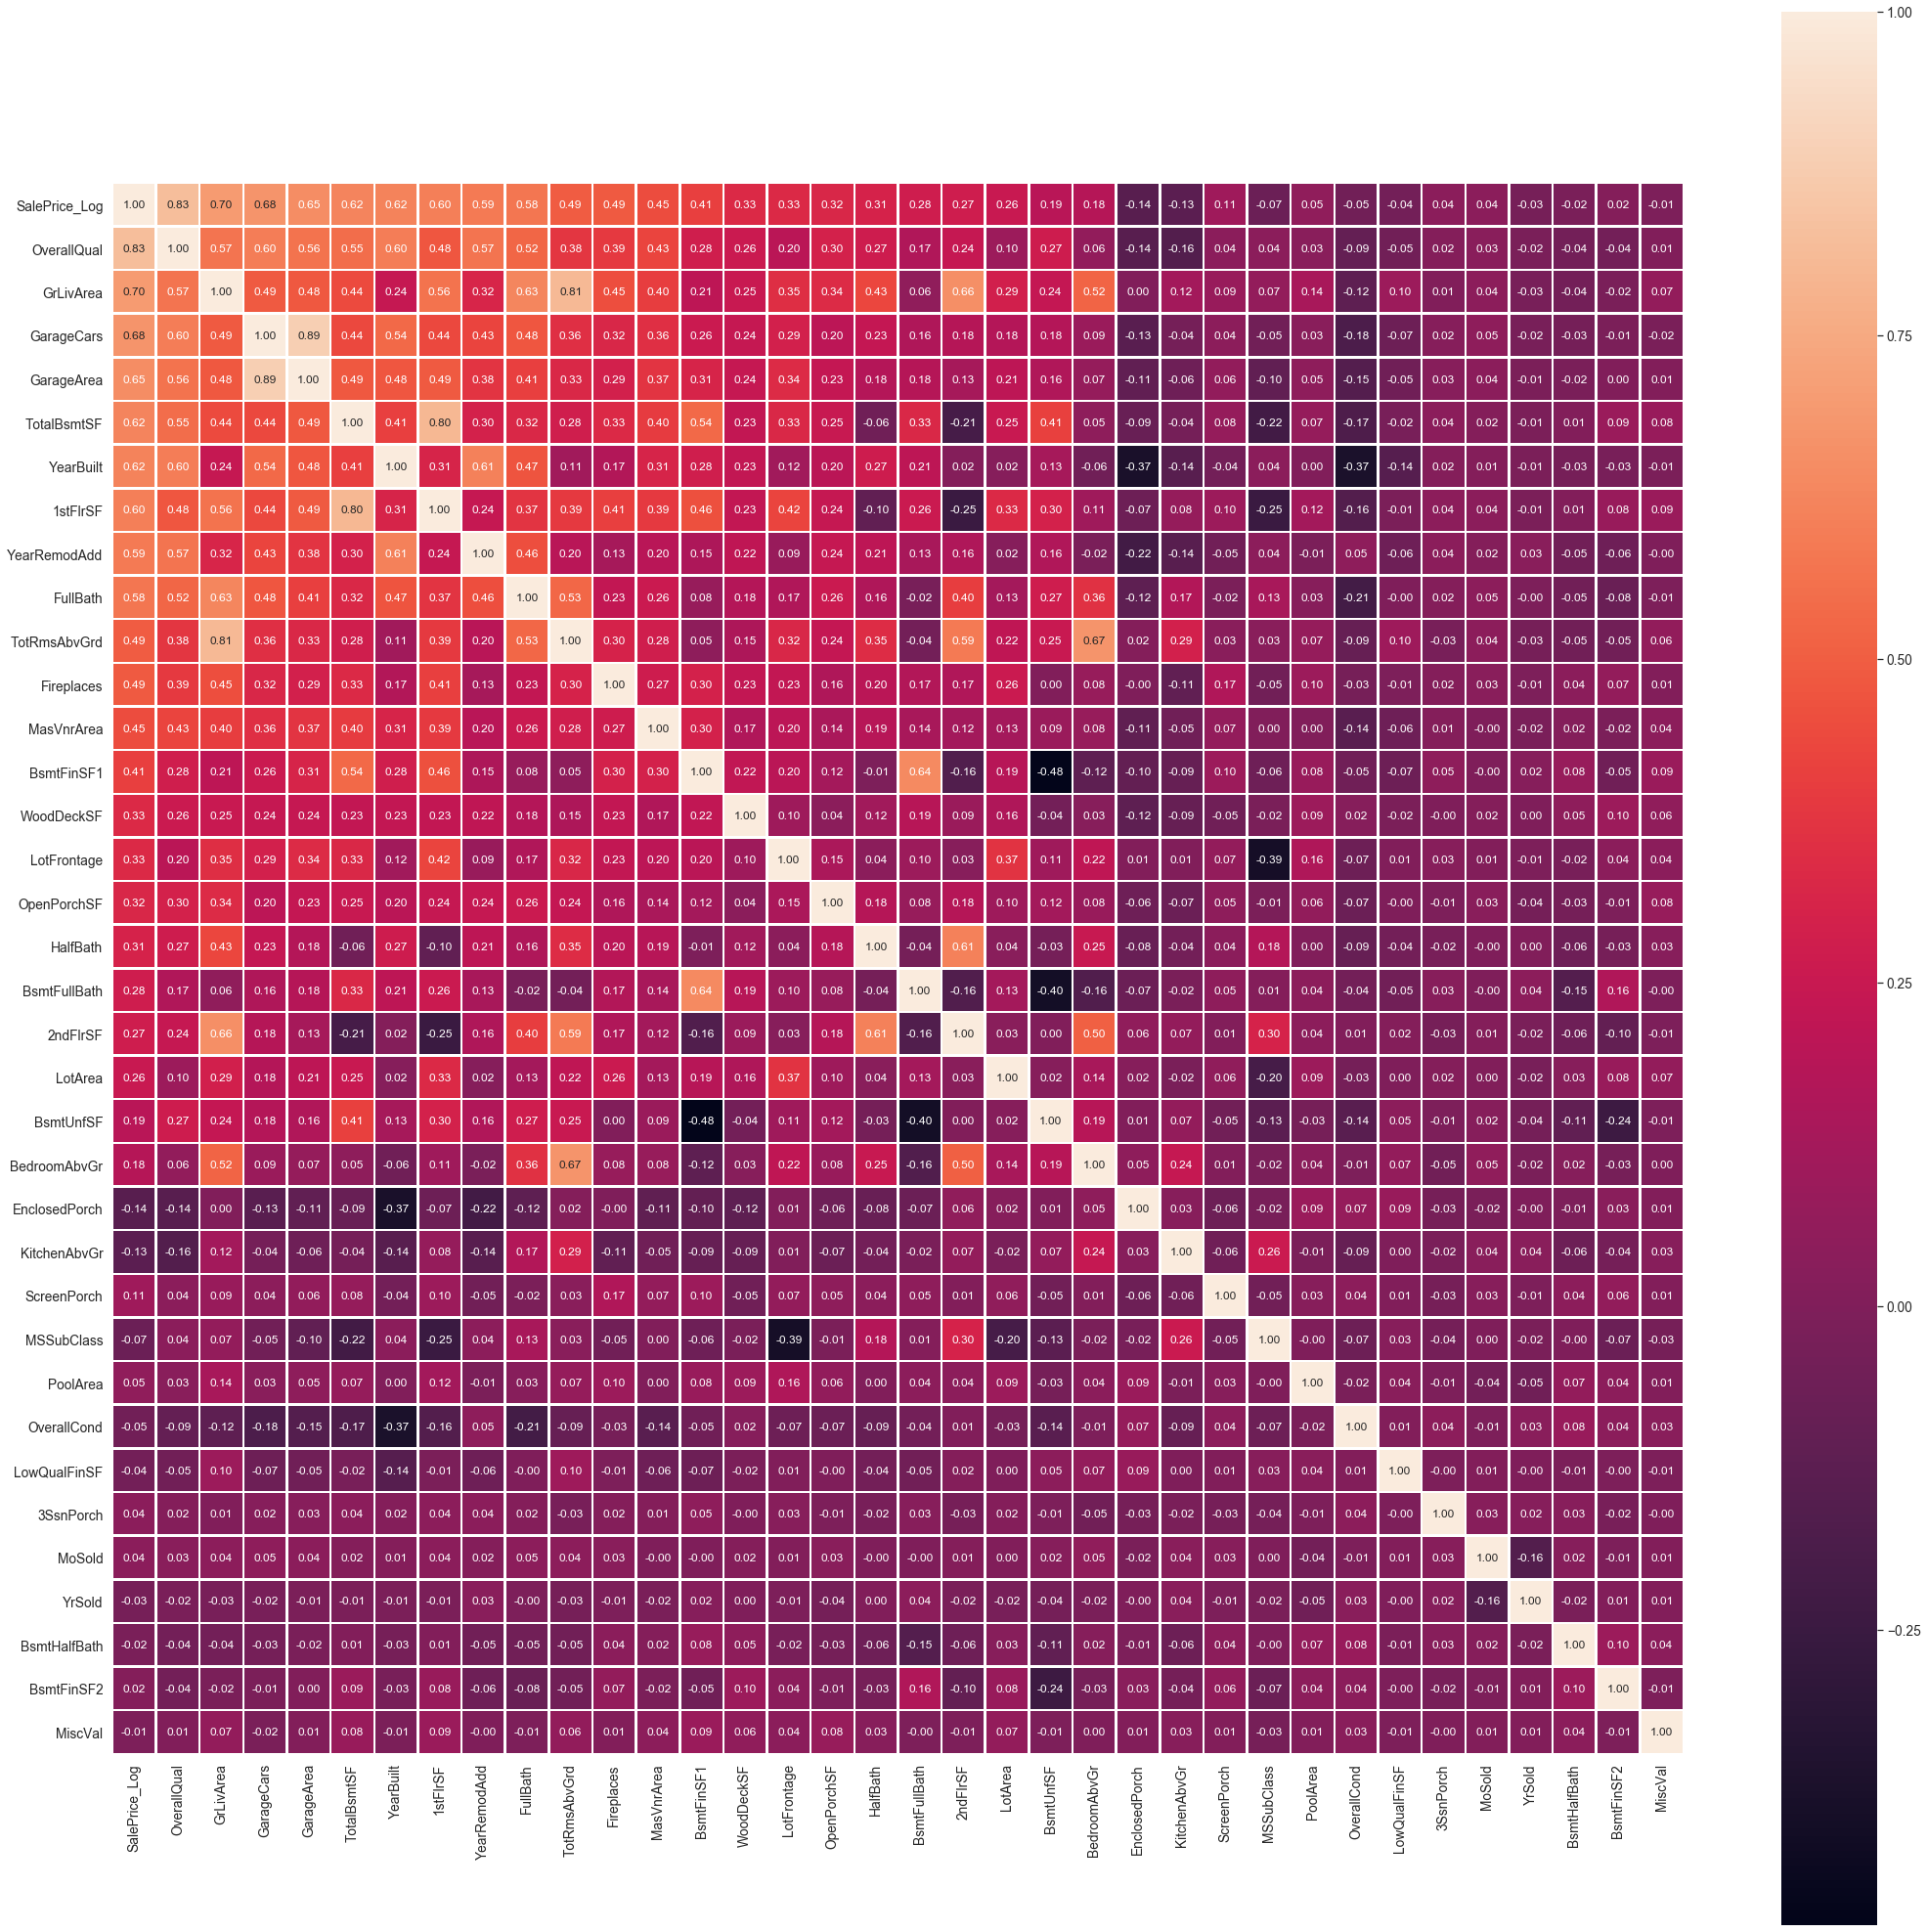

In [286]:
num_feats = num_cols_g + num_cols_r + num_cols_s + num_cols_k + num_cols_b + ['SalePrice_Log']
cat_feats = cat_cols_g + cat_cols_r + cat_cols_s + cat_cols_k + cat_cols_b

def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c, nr_c))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 12}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()
print(num_feats)
plot_corr_matrix(df_train, len(num_feats), 'SalePrice_Log')

# look at this and eliminate stuff

In [287]:
def get_corr_pairs(df):
    corrs = df.corr() >= 0.6
    names = list(corrs.index)
    corr_pairs={}
    for item in sorted(corrs):
        corr_pairs[item] = [ names[ind] for ind, row in enumerate(corrs[item]) if row and names[ind] != item ]
    return corr_pairs
    
print(get_corr_pairs(df_train))

drops = ['TotRmsAbvGrd','GarageArea']
num_feats = list(set(num_feats) - set(drops))

{'1stFlrSF': ['TotalBsmtSF', 'SalePrice_Log'], '2ndFlrSF': ['GrLivArea', 'HalfBath'], '3SsnPorch': [], 'BedroomAbvGr': ['TotRmsAbvGrd'], 'BsmtFinSF1': ['BsmtFullBath'], 'BsmtFinSF2': [], 'BsmtFullBath': ['BsmtFinSF1'], 'BsmtHalfBath': [], 'BsmtUnfSF': [], 'EnclosedPorch': [], 'Fireplaces': [], 'FullBath': ['GrLivArea'], 'GarageArea': ['GarageCars', 'SalePrice_Log'], 'GarageCars': ['GarageArea', 'SalePrice_Log'], 'GrLivArea': ['2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 'SalePrice_Log'], 'HalfBath': ['2ndFlrSF'], 'KitchenAbvGr': [], 'LotArea': [], 'LotFrontage': [], 'LowQualFinSF': [], 'MSSubClass': [], 'MasVnrArea': [], 'MiscVal': [], 'MoSold': [], 'OpenPorchSF': [], 'OverallCond': [], 'OverallQual': ['SalePrice_Log'], 'PoolArea': [], 'SalePrice_Log': ['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'], 'ScreenPorch': [], 'TotRmsAbvGrd': ['GrLivArea', 'BedroomAbvGr'], 'TotalBsmtSF': ['1stFlrSF', 'SalePrice_Log'], 'WoodDeckSF': [], 'YearBuilt': [

In [288]:
# dummies
pd.get_dummies(df_train.loc[:,cat_feats])
testdf = pd.concat([df_train.loc[:,num_feats],pd.get_dummies(df_train.loc[:,cat_feats])],axis=1)
testdf


,BedroomAbvGr,OverallQual,BsmtHalfBath,YrSold,OverallCond,BsmtFullBath,BsmtFinSF2,YearBuilt,GarageCars,KitchenAbvGr,MiscVal,FullBath,1stFlrSF,LotFrontage,BsmtFinSF1,YearRemodAdd,GrLivArea,LotArea,LowQualFinSF,3SsnPorch,EnclosedPorch,2ndFlrSF,MoSold,BsmtUnfSF,WoodDeckSF,MasVnrArea,TotalBsmtSF,ScreenPorch,SalePrice_Log,HalfBath,MSSubClass,PoolArea,OpenPorchSF,Fireplaces,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Elev,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,6,0.0,2010,5,1.0,0.0,1960,2.0,1,0,1,1656,141.00000,639.0,1960,1656,31770,0,0,0,0,5,441.0,210,112.0,1080.0,0,12.278393,0,20,0,62,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,5,0.0,2010,6,0.0,144.0,1961,1.0,1,0,1,896,80.00000,468.0,1961,896,11622,0,0,0,0,6,270.0,140,0.0,882.0,120,11.561716,0,20,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,6,0.0,2010,6,0.0,0.0,1958,1.0,1,12500,1,1329,81.00000,923.0,1958,1329,14267,0,0,0,0,6,406.0,393,108.0,1329.0,0,12.055250,1,20,0,36,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,7,0.0,2010,5,1.0,0.0,1968,2.0,1,0,2,2110,93.00000,1065.0,1968,2110,11160,0,0,0,0,4,1045.0,0,0.0,2110.0,0,12.404924,1,20,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,3,5,0.0,2010,5,0.0,0.0,1997,2.0,1,0,2,928,74.00000,791.0,1998,1629,13830,0,0,0,701,3,137.0,212,0.0,928.0,0,12.154253,1,60,0,34,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,3,6,0.0,2006,6,1.0,0.0,1984,2.0,1,0,1,1003,37.00000,819.0,1984,1003,7937,0,0,0,0,3,184.0,120,0.0,1003.0,0,11.867097,0,80,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2926,2,5,0.0,2006,5,1.0,324.0,1983,2.0,1,0,1,902,69.22459,301.0,1983,902,8885,0,0,0,0,6,239.0,164,0.0,864.0,0,11.782953,0,20,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2927,3,5,1.0,2006,5,0.0,0.0,1992,0.0,1,700,1,970,62.00000,337.0,1992,970,10441,0,0,0,0,7,575.0,80,0.0,912.0,0,11.790557,0,85,0,32,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,

In [289]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


1.5697180636171475
0.0003660600878263499


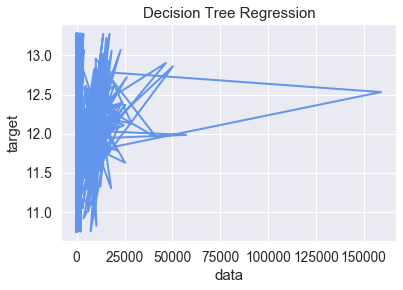

0.0043549529412425896


,Actual,Predicted
2465,200825.0,200825.0
714,110000.0,110000.0
2905,164000.0,164000.0
2043,50000.0,50000.0
672,153000.0,153000.0
...,...,...
2532,142000.0,142000.0
774,134900.0,134900.0
2236,150909.0,150909.0
2213,239000.0,239000.0


In [290]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

X = testdf.drop('SalePrice_Log',axis=1)
y = testdf['SalePrice_Log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4 )

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=50)
regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

print(mean_absolute_percentage_error(y_test,y_1))
print(mean_absolute_percentage_error(y_test,y_2))
    
plt.figure()
# plt.scatter(X,y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_2, color="cornflowerblue",
         label="max_depth=2", linewidth=2)

# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.show()
df = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(y_2)})

print(mean_absolute_percentage_error(np.exp(y_test),np.exp(y_2)))

df

In [ ]:

"""
- MAPE

models to run 
- linear reg  -- problems(fix)
- svm 
- gradient boosting
    Gradient Boosting algorithms
    GBM
    XGBoost
    LightGBM
    CatBoost
- random forest 
- Naive Bayes
- kNN
- K-Means
- Decision Tree
- Naive Bayes
- Dimensionality Reduction Algorithms

"""

In [336]:
df_orig = pd.read_csv("/Users/gandharkamat/projects/8010/Final/orig.csv")
df_test_orig = pd.read_csv("/Users/gandharkamat/projects/8010/Final/test.csv")

df_test_orig.columns
df_orig.columns

merged = pd.merge(df_test_orig, df_orig,  how='inner', on=['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'OverallQual', 'OverallCond', 'MSSubClass', 'LotArea', 'LotFrontage', 'GarageCars', 'GarageArea', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])

print(len(merged),len(merged['Id'].unique()),len(df_test_orig),len(df_orig))
merged['Id'].value_counts()

merged.drop(379,inplace=True)
merged.drop(1408,inplace=True)
merged.drop(399,inplace=True)
merged.drop(1255,inplace=True)
len(merged)


1463 1459 1459 2930


1459

In [354]:
pd.get_dummies(df_test.loc[:,cat_feats])
finaltestdf = pd.concat([df_test.loc[:,num_feats],pd.get_dummies(df_test.loc[:,cat_feats])],axis=1)

common_cols = [ item for item in list(finaltestdf.columns) if item in list(X.columns)]

regr_3 = DecisionTreeRegressor(max_depth=50)
regr_3.fit(X.loc[:,common_cols], y)
t
# total = finaltestdf.isnull().sum().sort_values(ascending=False)
# percent = (finaltestdf.isnull().sum()/finaltestdf.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(20))

y_3 = regr_3.predict(finaltestdf.loc[:,common_cols])

df = pd.DataFrame({'Actual': merged['SalePrice'], 'Predicted': np.exp(y_3)})

print(100 - mean_absolute_percentage_error(merged['SalePrice'],np.exp(y_3)))
print(np.sqrt(metrics.mean_squared_error(merged['SalePrice'],np.exp(y_3))))
df


/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


99.99360859045527
289.4828325663442


,Actual,Predicted
0,105000,105000.000000
1,172000,172000.000000
2,189900,189966.660817
3,195500,195500.000000
4,191500,191500.000000
...,...,...
1458,90500,90500.000000
1459,71000,71000.000000
1460,131000,131000.000000
1461,132000,132000.000000
